In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv ('data/Disneyland-all.csv')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


#### Separate Disneyland Branch

In [5]:
df['Location'] = df.Branch.str[11:]
df.drop(columns="Branch", inplace=True)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Location
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


In [6]:
df['Location'].value_counts()

California    19406
Paris         13630
HongKong       9620
Name: Location, dtype: int64

In [7]:
disney_ca = df.loc[df['Location'] == "California"]
disney_ca.to_csv("Disney-Anaheim.csv")

disney_fr = df.loc[df['Location'] == "Paris"]
disney_fr.to_csv("Disney-Paris.csv")

disney_hk = df.loc[df['Location'] == "HongKong"]
disney_hk.to_csv("Disney-HK.csv")

### Average Ratings from each location

In [8]:
np.mean(disney_ca['Rating'])

4.405338555086056

In [9]:
np.mean(disney_fr['Rating'])

3.96008804108584

In [10]:
np.mean(disney_hk['Rating'])

4.204158004158004

### Visualize where visitors are from


United States     12339
Australia          2448
Canada             1842
United Kingdom     1019
New Zealand         527
                  ...  
Vanuatu               1
Jersey                1
Armenia               1
Ukraine               1
Estonia               1
Name: Reviewer_Location, Length: 111, dtype: int64


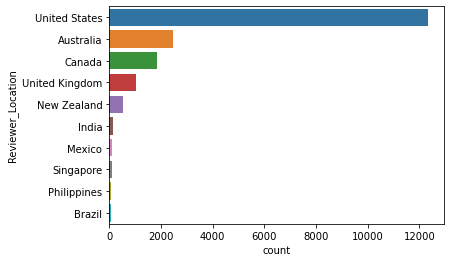

In [13]:
print(disney_ca['Reviewer_Location'].value_counts())

from pylab import savefig

graph = sns.countplot(y="Reviewer_Location", data=disney_ca,
              order=disney_ca.Reviewer_Location.value_counts().iloc[:10].index)
figure = graph.get_figure() 
figure.savefig('output/ca_visitors.jpg', dpi=300, bbox_inches='tight')

United Kingdom        7992
United States         1331
Australia              595
Ireland                430
India                  293
                      ... 
Dominican Republic       1
Honduras                 1
Macau                    1
Ethiopia                 1
Senegal                  1
Name: Reviewer_Location, Length: 133, dtype: int64


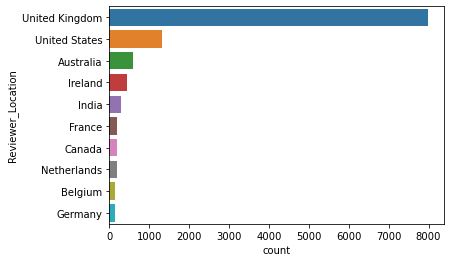

In [14]:
print(disney_fr['Reviewer_Location'].value_counts())

graph = sns.countplot(y="Reviewer_Location", data=disney_fr, 
              order=disney_fr.Reviewer_Location.value_counts().iloc[:10].index)
figure = graph.get_figure() 
figure.savefig('output/fr_visitors.jpg', dpi=300, bbox_inches='tight')

Australia                   1636
India                       1083
Philippines                  991
United States                881
Singapore                    852
                            ... 
Northern Mariana Islands       1
Laos                           1
Bulgaria                       1
Luxembourg                     1
Vanuatu                        1
Name: Reviewer_Location, Length: 117, dtype: int64


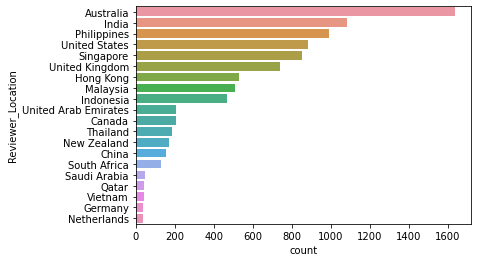

In [15]:
print(disney_hk['Reviewer_Location'].value_counts())

graph = sns.countplot(y="Reviewer_Location", data=disney_hk, 
              order=disney_hk.Reviewer_Location.value_counts().iloc[:20].index)
figure = graph.get_figure() 
figure.savefig('output/hk_visitors.jpg', dpi=300, bbox_inches='tight')